In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom
import seaborn as sns

In [19]:
colors = sns.color_palette("colorblind", 10, desat=0.8)
sns.set_palette(colors)



# Exercise 1

We want to find out the population of N identical things,
e.g. fish, cancer cells, gas in a semi-evacuated volume, etc.
We extract K that are identified (tagged, radioactive
marked, isotope altered, etc.) and released back into the
population (N). After sufficiently re-mixing, n things are
extracted and checked as to whether they have been
previously tagged (k).

____


*For n=60, K=100, and k=10, what is the total population (N)?*

The ratio of tagged individuals in the first sample would be 100 / N 

The ratio of tagged individuals in the second sample would be 10 / 60

This ratio would assumed to be the same for each draw from that population so we can equal the two rations and solve for N.

$N = \frac{100 \cdot 60}{10} = 600$


___ 

Natural guess is $N=100/10 \cdot 60$, but that gives only a single number.
What we want is the posterior distribution , i.e. $P(N|k)$, which
provides more information.

We can use Bayes' theorem to calculate the posterior distribution.
$P(N|k) = \frac{P(k|N)P(N)}{P(k)}$

In [10]:
### Prior ###

# Assuming no prior information
def flat_prior(N):
    return np.ones_like(N)

# Assuming a that a smaller N is more likely
def hyperbolic_prior(N):
    return 1/N


In [11]:
### Likelihood ###

def likelihood(N, K, k, n = 60):
    '''
    N: array of possible values for the population size
    n: sample size of the draw
    k: number of tagged individuals in the draw
    K: tagged individuals in the population
    '''
    # Binomial distribution
    return binom(K, k) * binom(N-K, n-k) / binom(N, n)
    


In [12]:
### Posterior ###

def posterior(N, K, k, n = 60, prior = flat_prior):
    '''
    N: array of possible values for the population size
    n: sample size of draw
    k: number of tagged (successes) individuals in the draw
    K: tagged (successes) individuals in the population
    prior: prior distribution
    '''

    # Without normalizing
    return likelihood(N, K, k, n) * prior(N) 

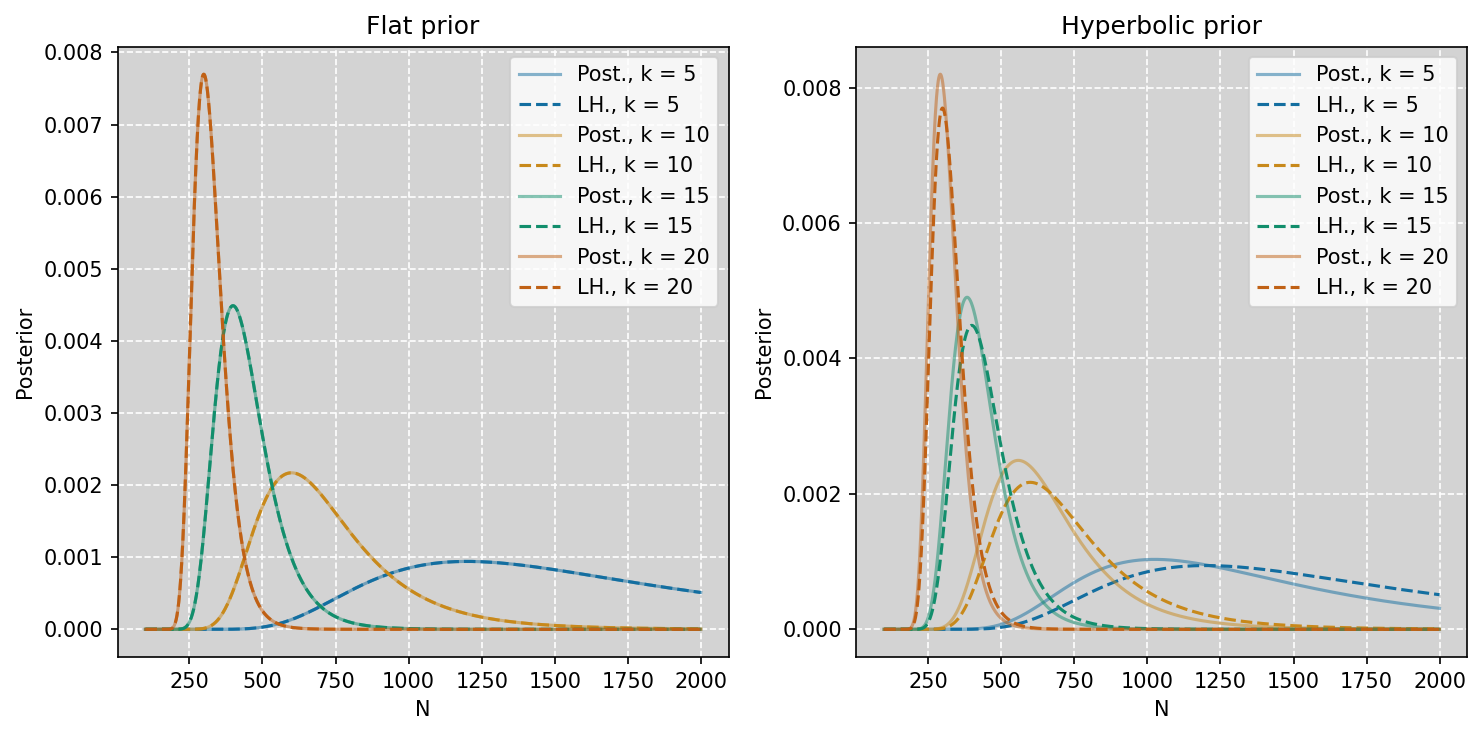

In [27]:
### Drawing distribution ###

# Defining a N distribution range
N = np.arange(100, 2000, 1)          # As the first sample is 100, the range starts at 100
k_list = np.arange(5, 25, 5)
K = 100

fig, ax = plt.subplots(1,2, figsize = (10,5), dpi=150)

for i, k in enumerate(k_list):
    # Computing the posterior (flat prior)
    l_flat = likelihood(N, K, k)
    post_flat = posterior(N, K, k, prior = flat_prior)
    
    # Normalizing the posterior using np.trapz
    int_flat = np.trapz(post_flat, N)
    

    # Computing the posterior (hyperbolic prior)
    l_hyper = likelihood(N, K, k)
    post_hyper = posterior(N, K, k, prior = hyperbolic_prior)

    # Normalizing the posterior using np.trapz
    int_hyper = np.trapz(post_hyper, N)

    # Plotting
    ax[0].plot(N, post_flat/int_flat, label = f'Post., k = {k}', color=colors[i], alpha = 0.5)
    ax[0].plot(N, l_flat/int_flat, label = f'LH., k = {k}', linestyle = '--', color=colors[i])
    ax[0].set_title('Flat prior')
    ax[0].set_xlabel('N')
    ax[0].set_ylabel('Posterior')
    ax[0].legend()
    ax[0].set_facecolor('lightgrey')
    ax[0].grid(color='white', linestyle='--')

    ax[1].plot(N, post_hyper/int_hyper, label = f'Post., k = {k}', color=colors[i], alpha = 0.5)
    ax[1].plot(N, l_hyper/int_flat, label = f'LH., k = {k}', linestyle = '--', color=colors[i])
    ax[1].set_title('Hyperbolic prior')
    ax[1].set_xlabel('N')
    ax[1].set_ylabel('Posterior')
    ax[1].legend()
    ax[1].set_facecolor('lightgrey')
    ax[1].grid(color='white', linestyle='--')


plt.tight_layout()
